In [1]:
import pandas as pd
import time
import probabilitylib as pl
import random
from probabilitylib import ProbabilitySpace
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generate_customer_data(num_records):
    data = []

    def maybe_nan(value):
        return value if random.random() > 0.2 else np.nan  

    for _ in range(num_records):
        age = np.random.randint(18, 80)
       
        #Income is loosely based on age
        base_income = 20000 + (age - 18) * 1000
        income = np.random.normal(base_income, base_income * 0.2)
       
        #Credit score is influenced by age and income
        credit_score = min(850, max(300, int(600 + (age/80)*100 + (income/100000)*100 + np.random.normal(0, 50))))
       
        #Loan amount is based on income and credit score
        max_loan = income * (credit_score / 600)
        loan_amount = np.random.uniform(0, max_loan)

        gender = np.random.choice(['Male', 'Female'])

        if age <= 30 and gender == "Female":
            smoker_prob = 0.1
        elif age <= 30 and gender == "Male":
            smoker_prob = 0.05
        elif age in range(31, 50) and gender == "Female":
            smoker_prob = 0.35
        elif age in range(31, 50) and gender == "Male":
            smoker_prob = 0.25
        elif age >= 51 and gender == "Female":
            smoker_prob = 0.6
        else:
            smoker_prob = 0.5
            
        smoker = random.choices([True, False], weights=[smoker_prob, 1 - smoker_prob])[0]

        weights = np.random.random()

    
        row = [
            maybe_nan(age),
            maybe_nan(income),
            maybe_nan(credit_score),
            maybe_nan(loan_amount),
            maybe_nan(gender),
            maybe_nan(smoker),
            maybe_nan(weights)
        ]
        data.append(row)

    return pd.DataFrame(data, columns=['Age', 'Income', 'CreditScore', 'LoanAmount', 'Gender', 'Smoker', 'weights'])

df = generate_customer_data(500000)

In [3]:
import csv
#df["weights"] = df["weights"]/df["weights"].sum()
#print(df["weights"].sum())
print(len(df))

df["GenderNumeric"] = df["Gender"].map({"Male": 0, "Female": 1})
ps = ProbabilitySpace(df)

d = df.to_csv("example.csv", index=False)
print("CSV file 'example.csv' created successfully.")
times = []
var_name = []
# Open the file in write mode

500000
weights column does not sum to 1. Normalisation procedure enabled
CSV file 'example.csv' created successfully.


In [4]:
results = []
iteration_times = []
chunk_sizes = []
variables = []



np.random.seed(42)
start_time = time.time()

for i in range(100):

    var = random.choice(["Age", "Income", "CreditScore", "LoanAmount", "GenderNumeric"])
    variables.append(var)
    
    res = pl.expected_mean(ps, var)
   
    results.append(res)

end_time = time.time()
expected_mean_time = end_time-start_time
times.append(expected_mean_time)
var_name.append("expected_mean")
print(expected_mean_time)
res = list(dict.fromkeys(results))
print(res)

1.8176279067993164
[0.5010998374795252, 50498.39848125583, 710.3132125072802, 30610.678308906892, 48.515898824791876]


In [5]:
results = []
iteration_times = []
chunk_sizes = []
variables = []

np.random.seed(42)
start_time = time.time()

for i in range(100):

    var = random.choice(["Age", "Income", "CreditScore", "LoanAmount", "GenderNumeric"])
    variables.append(var)
    res = pl.variance(ps, var)
    results.append(res)

end_time = time.time()
variance_time = (end_time-start_time)
times.append(variance_time)
var_name.append("variance")
res = list(dict.fromkeys(results))
print(res)

[0.24999879035751865, 4136.075897239323, 586601560.3738276, 435037237.2664962, 319.98067475389416]


In [6]:
results = []
iteration_times = []
variables = []

np.random.seed(42)
start_time = time.time()

for i in range(100):

    var = random.choice(["Age", "Income", "CreditScore", "LoanAmount", "GenderNumeric"])
    variables.append(var)
    res = pl.IQR(ps, var)["IQR"]
    results.append(res)

end_time = time.time()
IQR_time = (end_time-start_time)
times.append(IQR_time)
var_name.append("IQR")
res = list(dict.fromkeys(results))
print(res)

[90.0, 31778.092183969886, 31.0, 1.0, 31806.954289482426]


In [7]:
results = []
iteration_times = []
variables = []
start_time = time.time()

for i in range(100):
    
    x = random.choice([1, 2, 3, 4, 5])    
  
    if x==1:

        res = pl.conditional(
            ps,
            event_condition = ps.df["Smoker"] == True,
            given_condition = ps.df["GenderNumeric"] == 0
        )
               

    if x==2:

        res = pl.conditional(
            ps,
            event_condition = ps.df["Smoker"] == True,
            given_condition = ps.df["Income"] > 40000
        )
               

    if x==3:

        res = pl.conditional(
            ps,
            event_condition = ps.df["CreditScore"] < 650,
            given_condition = ps.df["Income"] > 40000
        )
               

    if x==4:

        res = pl.conditional(
            ps,
            event_condition = ps.df["Age"] < 65,
            given_condition = ps.df["Income"] > 40000
        )
               
        
    if x==5:

        res = pl.conditional(
            ps,
            event_condition = ps.df["GenderNumeric"] == 0,
            given_condition = ps.df["Gender"] == "Male"
        )

    results.append(res)

end_time = time.time()
conditional_time = (end_time-start_time)
times.append(conditional_time)
var_name.append("conditional")
res = list(dict.fromkeys(results))
print(res)

[0.056053243673818226, 1.0, 0.2625778885337961, 0.5001530802687116, 0.38461198574494126]


In [8]:
results = []
iteration_times = []
variables = []
start_time = time.time()

for i in range(100):
    
    x = random.choice([1, 2, 3, 4, 5])    
  
    if x==1:

        res = pl.joint_probability(
            ps,
            condition_A = ps.df["Smoker"] == True,
            condition_B = ps.df["GenderNumeric"] == 0,
            con="dependent"
        )
               

    if x==2:

        res = pl.joint_probability(
            ps,
            condition_A = ps.df["Smoker"] == True,
            condition_B = ps.df["Income"] > 40000,
            con="independent"
        )
               

    if x==3:

        res = pl.joint_probability(
            ps,
            condition_A = ps.df["CreditScore"] < 650,
            condition_B = ps.df["Income"] > 40000,
            con="dependent"
        )
               

    if x==4:

        res = pl.joint_probability(
            ps,
            condition_A = ps.df["Age"] < 65,
            condition_B = ps.df["Income"] > 40000,
            con="dependent"
        )
               
        
    if x==5:

        res = pl.joint_probability(
            ps,
            condition_A = ps.df["GenderNumeric"] == 0,
            condition_B = ps.df["Gender"] == "Male",
            con="dependent"
        )

    results.append(res)

end_time = time.time()
joint_probability_time = (end_time-start_time)
times.append(joint_probability_time)
var_name.append("joint_probability")
res = list(dict.fromkeys(results))
print(res)

[0.15304042399317513, 0.1047818808391352, 0.028698214846870313, 0.25606904459268254, 0.39905066425899316]


In [9]:
results = []
iteration_times = []
variables = []

start_time = time.time()

for i in range(100):

    var = random.choice(["Age", "Income", "CreditScore", "LoanAmount"])
    variables.append(var)
    res = pl.PDF_or_PMF(ps, var, var_type="continuous", plot=False)
    results.append(res)
    print(f"iteration {i} complete")

end_time = time.time()
PDF_time = (end_time-start_time)
times.append(PDF_time)
var_name.append("PDF_or_PMF (continuous)")

iteration 0 complete
iteration 1 complete
iteration 2 complete
iteration 3 complete
iteration 4 complete
iteration 5 complete
iteration 6 complete
iteration 7 complete
iteration 8 complete
iteration 9 complete
iteration 10 complete
iteration 11 complete
iteration 12 complete
iteration 13 complete
iteration 14 complete
iteration 15 complete
iteration 16 complete
iteration 17 complete
iteration 18 complete
iteration 19 complete
iteration 20 complete
iteration 21 complete
iteration 22 complete
iteration 23 complete
iteration 24 complete
iteration 25 complete
iteration 26 complete
iteration 27 complete
iteration 28 complete
iteration 29 complete
iteration 30 complete
iteration 31 complete
iteration 32 complete
iteration 33 complete
iteration 34 complete
iteration 35 complete
iteration 36 complete
iteration 37 complete
iteration 38 complete
iteration 39 complete
iteration 40 complete
iteration 41 complete
iteration 42 complete
iteration 43 complete
iteration 44 complete
iteration 45 complet

In [10]:
x_vals, pdf_vals = pl.PDF_or_PMF(ps, "Income", var_type="continuous", plot=False)
area_Income = np.trapz(pdf_vals, x_vals)

x_vals, pdf_vals = pl.PDF_or_PMF(ps, "CreditScore", var_type="continuous", plot=False)
area_CreditScore = np.trapz(pdf_vals, x_vals)

x_vals, pdf_vals = pl.PDF_or_PMF(ps, "Age", var_type="continuous", plot=False)
area_Age = np.trapz(pdf_vals, x_vals)

x_vals, pdf_vals = pl.PDF_or_PMF(ps, "LoanAmount", var_type="continuous", plot=False)
area_LoanAmount = np.trapz(pdf_vals, x_vals)

print([area_Income, area_CreditScore, area_Age, area_LoanAmount])

[0.96307680246262, 0.9403974282047391, 0.7718103892852382, 0.825389781328852]


In [11]:
results = []
res_PMF = []
iteration_times = []
variables = []

np.random.seed(42)
start_time = time.time()

for i in range(100):
    iter_start = time.time()

    var = random.choice(["Age", "Income", "CreditScore", "LoanAmount"])
    variables.append(var)
    res = pl.PDF_or_PMF(ps, var, var_type="discrete", plot=False)
    results.append(res)
    
    iter_end = time.time()
    iteration_times.append(iter_end - iter_start)

end_time = time.time()
PMF_time = (end_time-start_time)
times.append(PMF_time)
var_name.append("PDF_or_PMF (discrete)")

#check that all PDFs sum to 1
for res in results:
    res_PMF.append(res.sum())
res = list(dict.fromkeys(res_PMF))
print(res)

[1.0, 1.0000000000000002, 0.9999999999999999]


In [12]:
results = []
res_EDF = []
iteration_times = []
variables = []
start_time = time.time()

for i in range(100):
    iter_start = time.time()

    var = random.choice(["Age", "Income", "CreditScore", "LoanAmount"])
    variables.append(var)
    res, cdf = pl.EDF_or_CDF(ps, var, var_type="discrete", plot=False)
    results.append(cdf)
    
    iter_end = time.time()
    iteration_times.append(iter_end - iter_start)

end_time = time.time()
EDF_time = (end_time-start_time)
times.append(EDF_time)
var_name.append("EDF_or_CDF (discrete)")

#check that EDF's last value is 1
for cdf in results:
    res_EDF.append(cdf[-1])
res = list(dict.fromkeys(res_EDF))
print(res)

[0.9999999999999999, 0.9999999999999933, 0.9999999999999909, 0.9999999999999996]


In [13]:
results = []
res_CDF = []
iteration_times = []
variables = []
start_time = time.time()

for i in range(100):

    var = random.choice(["Age", "Income", "CreditScore", "LoanAmount"])
    variables.append(var)
    res, cdf = pl.EDF_or_CDF(ps, var, var_type="continuous", plot=False)
    results.append(cdf)


end_time = time.time()
CDF_time = (end_time-start_time)
times.append(CDF_time)
var_name.append("EDF_or_CDF (continuous)")

#check that EDF's last value is 1
for cdf in results:
    res_CDF.append(cdf[-1])
res = list(dict.fromkeys(res_EDF))
print(res)

[0.9999999999999999, 0.9999999999999933, 0.9999999999999909, 0.9999999999999996]


In [14]:
res = pl.independence(ps, "Gender", "Smoker")
print(f"Gender/Smoker: {res["p_value"]}")

bin_boundaries = pl.bin_continuous_columns(ps, ["Age"], return_edges=True)
res = pl.independence(ps, "Gender", "Age", bin_boundaries=bin_boundaries)
print(f"Gender/Age: {res["p_value"]}")

res = pl.independence(ps, "Gender", "GenderNumeric")
print(f"Gender/GenderNumeric: {res["p_value"]}")

bin_boundaries = pl.bin_continuous_columns(ps, ["Income", "Age"], return_edges=True)
res = pl.independence(ps, "Income", "Age", bin_boundaries=bin_boundaries)
print(f"Income/Age: {res["p_value"]}")

bin_boundaries = pl.bin_continuous_columns(ps, ["LoanAmount"], return_edges=True)
res = pl.independence(ps, "LoanAmount", "Smoker", bin_boundaries=bin_boundaries)
print(f"LoanAmount/Smoker: {res["p_value"]}")

Gender/Smoker: 0.025656347103944998
Gender/Age: 0.9999854125705314
Gender/GenderNumeric: 4.2748978646313095e-175
Income/Age: 8.49541055811593e-131
LoanAmount/Smoker: 9.55757775265241e-05


In [15]:
bin_boundaries = pl.bin_continuous_columns(ps, ["Age"], return_edges=True)

start_time = time.time()

for i in range(100):
    res = pl.independence(ps, "Age", "Smoker", bin_boundaries=bin_boundaries)

end_time = time.time()
independence_time = (end_time-start_time)
times.append(independence_time)
var_name.append("independence")

In [16]:
res = pl.mutual_information(ps, "Gender", "Smoker")
print(f"Gender/Smoker: {res}")

bin_boundaries = pl.bin_continuous_columns(ps, ["Age"], return_edges=True)
res = pl.mutual_information(ps, "Gender", "Age", bin_boundaries=bin_boundaries)
print(f"Gender/Age: {res}")

res = pl.mutual_information(ps, "Gender", "GenderNumeric")
print(f"Gender/GenderNumeric: {res}")

bin_boundaries = pl.bin_continuous_columns(ps, ["Income", "Age"], return_edges=True)
res = pl.mutual_information(ps, "Income", "Age", bin_boundaries=bin_boundaries)
print(f"Income/Age: {res}")

bin_boundaries = pl.bin_continuous_columns(ps, ["LoanAmount"], return_edges=True)
res = pl.mutual_information(ps, "LoanAmount", "Smoker", bin_boundaries=bin_boundaries)
print(f"LoanAmount/Smoker: {res}")

Gender/Smoker: 0.006037841063921842
Gender/Age: 1.2210894932856615e-05
Gender/GenderNumeric: 0.9999965097067671
Income/Age: 0.7803546340464051
LoanAmount/Smoker: 0.02367910168991419


In [37]:
bin_boundaries = pl.bin_continuous_columns(ps, ["Age"], return_edges=True)

start_time = time.time()

for i in range(100):
    res = pl.mutual_information(ps, "Age", "Smoker", bin_boundaries=bin_boundaries)

end_time = time.time()
mutual_information_time = (end_time-start_time)
times.append(mutual_information_time)
var_name.append("mutual_information")

In [47]:
bin_boundaries = pl.bin_continuous_columns(ps, ["Age", "CreditScore", "LoanAmount", "Income"], return_edges=True)

start_time = time.time()

for i in range(100):
    model, _ = pl.build_bayesian_network(
        ps,
        scoring_method='BIC',
        n_samples=None,
        scale_factor=1,
        random_state=i,
        bin_boundaries=bin_boundaries
    )

end_time = time.time()
build_bayesian_network_time = (end_time-start_time)
times.append(build_bayesian_network_time)
var_name.append("build_bayesian_network")

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Income': 'N', 'CreditScore': 'N', 'LoanAmount': 'N', 'Gender': 'C', 'Smoker': 'C', 'GenderNumeric': 'N'}


In [49]:
print(times, var_name)

[1.8176279067993164, 3.7319493293762207, 2.85280704498291, 2.0889079570770264, 1.8125267028808594, 159.08427238464355, 6.6503283977508545, 7.8545074462890625, 3.7526330947875977, 7.734652519226074, 9.171698093414307, 93.39946246147156] ['expected_mean', 'variance', 'IQR', 'conditional', 'joint_probability', 'PDF_or_PMF (continuous)', 'PDF_or_PMF (discrete)', 'EDF_or_CDF (discrete)', 'EDF_or_CDF (continuous)', 'independence', 'mutual_information', 'build_bayesian_network']


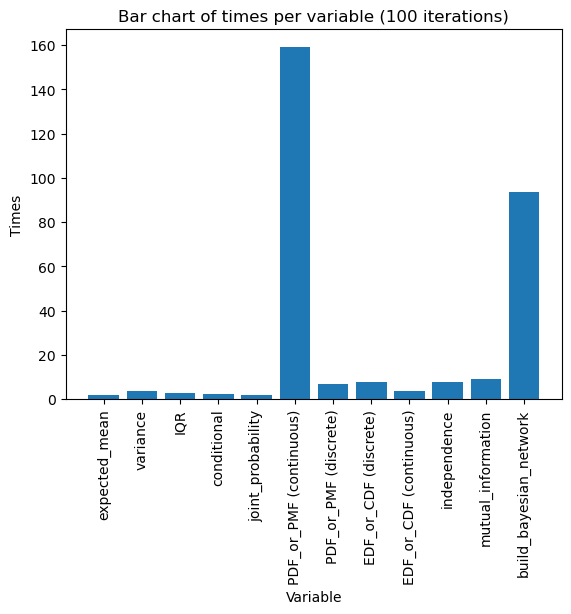

In [63]:
df_times = pd.DataFrame({
    "variable": var_name,
    "times": times
})


plt.bar(df_times["variable"], df_times["times"])
plt.xlabel("Variable")
plt.ylabel("Times")
plt.title("Bar chart of times per variable (100 iterations)")
plt.xticks(rotation=90) 
plt.savefig("Bar_chart_of_times_per_variable.png", dpi=300, bbox_inches='tight')
plt.show()

In [65]:
df_times = df_times.sort_values(by="times", ascending=False)
df_times

,variable,times
5,PDF_or_PMF (continuous),159.084272
11,build_bayesian_network,93.399462
10,mutual_information,9.171698
7,EDF_or_CDF (discrete),7.854507
9,independence,7.734653
6,PDF_or_PMF (discrete),6.650328
8,EDF_or_CDF (continuous),3.752633
1,variance,3.731949
2,IQR,2.852807
3,conditional,2.088908


Processing chunks: 4it [00:00, 16.54it/s]

Chunk weights sum: 0.009888
Chunk weights sum: 0.010010
Chunk weights sum: 0.009987
Chunk weights sum: 0.010081


Processing chunks: 8it [00:00, 17.92it/s]

Chunk weights sum: 0.010084
Chunk weights sum: 0.009946
Chunk weights sum: 0.009858
Chunk weights sum: 0.010148


Processing chunks: 12it [00:00, 17.73it/s]

Chunk weights sum: 0.009829
Chunk weights sum: 0.010036
Chunk weights sum: 0.010038
Chunk weights sum: 0.010008


Processing chunks: 15it [00:00, 18.04it/s]

Chunk weights sum: 0.010004
Chunk weights sum: 0.010095
Chunk weights sum: 0.009878
Chunk weights sum: 0.010016


Processing chunks: 19it [00:01, 17.81it/s]

Chunk weights sum: 0.010022
Chunk weights sum: 0.009943
Chunk weights sum: 0.009824
Chunk weights sum: 0.010077
Chunk weights sum: 0.010004


Processing chunks: 25it [00:01, 19.01it/s]

Chunk weights sum: 0.010106
Chunk weights sum: 0.010130
Chunk weights sum: 0.009945
Chunk weights sum: 0.009810


Processing chunks: 29it [00:01, 19.05it/s]

Chunk weights sum: 0.010038
Chunk weights sum: 0.009867
Chunk weights sum: 0.010104
Chunk weights sum: 0.010082


Processing chunks: 34it [00:01, 18.86it/s]

Chunk weights sum: 0.009888
Chunk weights sum: 0.010192
Chunk weights sum: 0.009921
Chunk weights sum: 0.009914
Chunk weights sum: 0.009970


Processing chunks: 38it [00:02, 18.60it/s]

Chunk weights sum: 0.009959
Chunk weights sum: 0.009989
Chunk weights sum: 0.010004
Chunk weights sum: 0.009852


Processing chunks: 42it [00:02, 18.84it/s]

Chunk weights sum: 0.010110
Chunk weights sum: 0.009961
Chunk weights sum: 0.010140
Chunk weights sum: 0.010001
Chunk weights sum: 0.010140


Processing chunks: 46it [00:02, 19.30it/s]

Chunk weights sum: 0.010126
Chunk weights sum: 0.010027
Chunk weights sum: 0.009867
Chunk weights sum: 0.009962


Processing chunks: 50it [00:02, 19.28it/s]

Chunk weights sum: 0.009794
Chunk weights sum: 0.010133
Chunk weights sum: 0.010034
Chunk weights sum: 0.010028


Processing chunks: 54it [00:02, 18.97it/s]

Chunk weights sum: 0.009899
Chunk weights sum: 0.010152
Chunk weights sum: 0.010183
Chunk weights sum: 0.010028


Processing chunks: 58it [00:03, 18.82it/s]

Chunk weights sum: 0.009782
Chunk weights sum: 0.009988
Chunk weights sum: 0.010025
Chunk weights sum: 0.010112


Processing chunks: 62it [00:03, 18.83it/s]

Chunk weights sum: 0.010043
Chunk weights sum: 0.010037
Chunk weights sum: 0.009900
Chunk weights sum: 0.010037


Processing chunks: 66it [00:03, 18.03it/s]

Chunk weights sum: 0.010003
Chunk weights sum: 0.010088
Chunk weights sum: 0.010091
Chunk weights sum: 0.010043


Processing chunks: 71it [00:03, 19.49it/s]

Chunk weights sum: 0.010072
Chunk weights sum: 0.010015
Chunk weights sum: 0.010018
Chunk weights sum: 0.010058
Chunk weights sum: 0.009961


Processing chunks: 76it [00:04, 20.29it/s]

Chunk weights sum: 0.010027
Chunk weights sum: 0.010083
Chunk weights sum: 0.010072
Chunk weights sum: 0.009999
Chunk weights sum: 0.009986


Processing chunks: 81it [00:04, 19.09it/s]

Chunk weights sum: 0.009799
Chunk weights sum: 0.010106
Chunk weights sum: 0.009850
Chunk weights sum: 0.009720


Processing chunks: 84it [00:04, 19.53it/s]

Chunk weights sum: 0.009855
Chunk weights sum: 0.009884
Chunk weights sum: 0.010078
Chunk weights sum: 0.010182


Processing chunks: 88it [00:04, 19.53it/s]

Chunk weights sum: 0.009798
Chunk weights sum: 0.009942
Chunk weights sum: 0.010208
Chunk weights sum: 0.009939
Chunk weights sum: 0.010019


Processing chunks: 94it [00:04, 21.01it/s]

Chunk weights sum: 0.010048
Chunk weights sum: 0.010018
Chunk weights sum: 0.009930
Chunk weights sum: 0.010015
Chunk weights sum: 0.010186


Processing chunks: 100it [00:05, 20.53it/s]

Chunk weights sum: 0.009904
Chunk weights sum: 0.009958
Chunk weights sum: 0.009981
Chunk weights sum: 0.009870
Chunk weights sum: 0.010133


Processing chunks: 100it [00:05, 19.03it/s]
Processing chunks: 1it [00:00,  2.74it/s]

Chunk weights sum: 0.099867


Processing chunks: 2it [00:00,  3.17it/s]

Chunk weights sum: 0.099905


Processing chunks: 3it [00:00,  3.36it/s]

Chunk weights sum: 0.099974


Processing chunks: 4it [00:01,  3.34it/s]

Chunk weights sum: 0.099871


Processing chunks: 5it [00:01,  3.33it/s]

Chunk weights sum: 0.100226


Processing chunks: 6it [00:01,  3.32it/s]

Chunk weights sum: 0.100241


Processing chunks: 7it [00:02,  3.34it/s]

Chunk weights sum: 0.100305


Processing chunks: 8it [00:02,  3.28it/s]

Chunk weights sum: 0.099942


Processing chunks: 9it [00:02,  3.29it/s]

Chunk weights sum: 0.099626


Processing chunks: 10it [00:03,  3.29it/s]

Chunk weights sum: 0.100043



Processing chunks: 1it [00:00,  1.84it/s]

Chunk weights sum: 0.199772


Processing chunks: 2it [00:01,  1.84it/s]

Chunk weights sum: 0.199845


Processing chunks: 3it [00:01,  1.84it/s]

Chunk weights sum: 0.200467


Processing chunks: 4it [00:02,  1.85it/s]

Chunk weights sum: 0.200247


Processing chunks: 5it [00:02,  1.85it/s]

Chunk weights sum: 0.199669



Processing chunks: 1it [00:01,  1.27s/it]

Chunk weights sum: 0.499844


Processing chunks: 2it [00:02,  1.29s/it]

Chunk weights sum: 0.500156


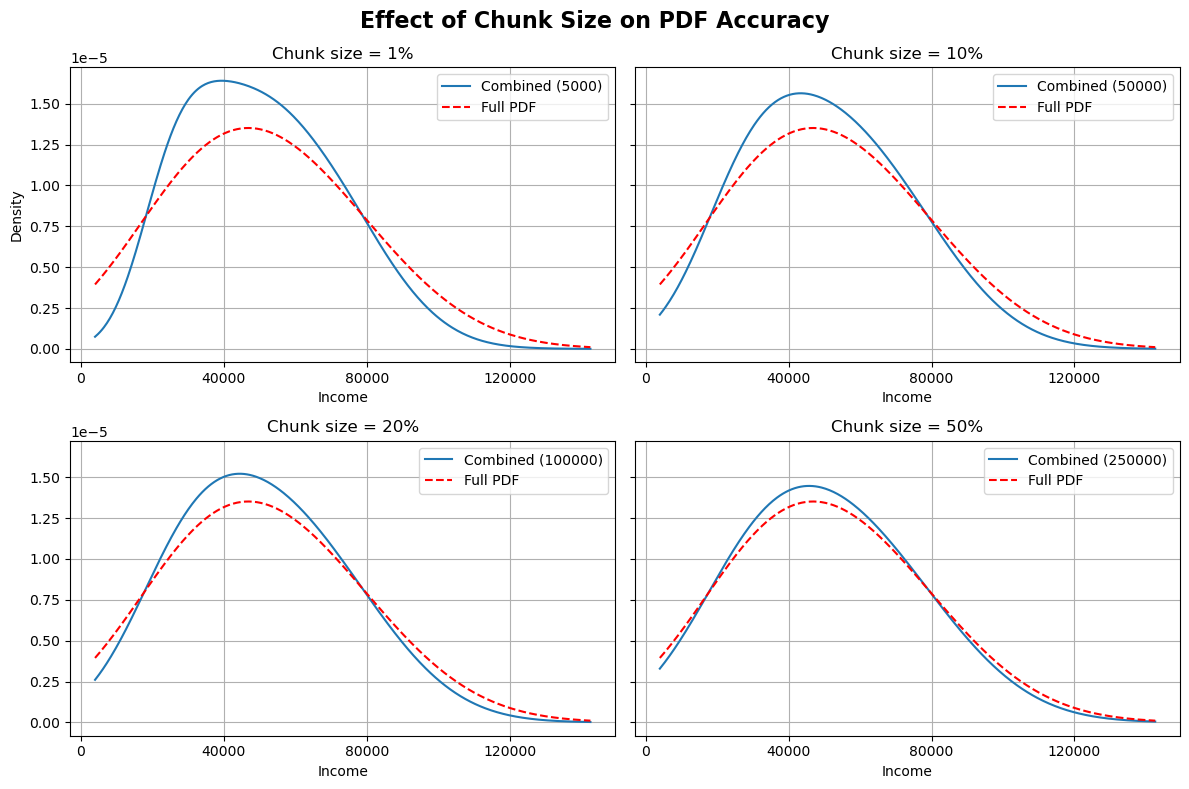

In [9]:
pdfs_by_m = {}
variable = "Income"
sd = pl.variance(ps, variable)**0.5
iqr = pl.IQR(ps, variable)["IQR"] 
global_min = ps.df[variable].min()
global_max = ps.df[variable].max() 

chunk_sizes_to_test = [5000, 50000, 100000, 250000]
pdfs_by_m = {}

# full PDF for comparison
full_grid, full_pdf = pl.PDF_or_PMF(ps, variable, var_type="continuous", plot=False)

# loop over different chunk sizes
for m in chunk_sizes_to_test:
    results = pl.process_in_chunks(
        "example.csv",
        m,
        pl.PDF_or_PMF,
        variable,
        var_type="continuous",
        sd=sd,
        iqr=iqr,
        n_samples=500000,
        global_min=global_min,
        global_max=global_max,
        grid_size=500
    )
    combined_grid, combined_pdf = pl.combine_PDF_or_PMF(results, var_type="continuous", plot=False)
    pdfs_by_m[m] = (combined_grid, combined_pdf)

# plot in grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
axes = axes.flatten()  # flatten to 1D for easy looping

for ax, (m, (grid, pdf)) in zip(axes, pdfs_by_m.items()):
    ax.plot(grid, pdf, label=f"Combined ({m})")
    ax.plot(full_grid, full_pdf, linestyle="--", color="red", label="Full PDF")
    
    pct = m / 500000 * 100  # percentage relative to 500k
    ax.set_title(f"Chunk size = {pct:.0f}%")
    
    ax.set_xlabel("Income")
    ax.grid(True)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    if ax == axes[0]:
        ax.set_ylabel("Density")
    ax.legend()

fig.suptitle("Effect of Chunk Size on PDF Accuracy", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.savefig("PDFs_computed_using_different_chunk_sizes.png", dpi=300, bbox_inches='tight')
plt.show()